# Élagage d'arbres de décision : La clé pour éviter le surapprentissage

[Lien du post MonShotData](https://www.monshotdata.com/p/surapprentissage-arbres-decision)

In [1]:
# Importer les fonctions nécessaires depuis sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Générer des données synthétiques pour entraîner l'arbre de décision
X, y = make_classification(
    n_samples = 1000, 
    n_features = 2, 
    n_informative = 2, 
    n_redundant = 0,
    n_repeated = 0
)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.33, random_state = 0)

# Créer un arbre de décision à l'aide de la configuration par défaut
tree_a = DecisionTreeClassifier(random_state = 0)
tree_a.fit(X_train, y_train)

# Évaluer les performances de l'arbre de décision sur les données d'apprentissage
train_score = tree_a.score(X_train, y_train)
roc_auc = roc_auc_score(y_test, tree_a.predict_proba(X_test)[:,1])
print(train_score, roc_auc)

1.0 0.8757025825649315


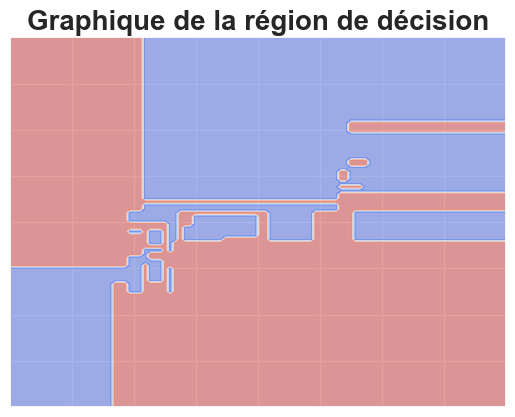

In [3]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = tree_a.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha = 0.5, cmap = 'coolwarm_r')
ax.set_title("Graphique de la région de décision", fontsize = 20, fontweight = "bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [4]:
# Construisez un deuxième arbre de décision, cette fois en utilisant une valeur non nulle pour ccp_alpha
tree_b = DecisionTreeClassifier(ccp_alpha = 0.005, random_state = 0)
tree_b.fit(X_train, y_train)

# Évaluer les performances du deuxième arbre de décision sur les données d'apprentissage
train_score = tree_b.score(X_train, y_train)
roc_auc = roc_auc_score(y_test, tree_b.predict_proba(X_test)[:,1])
print(train_score, roc_auc)

0.9388059701492537 0.9554939201351897


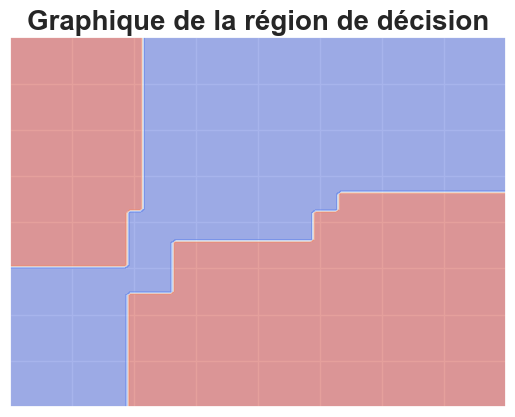

In [5]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = tree_b.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha = 0.5, cmap = 'coolwarm_r')
ax.set_title("Graphique de la région de décision", fontsize = 20, fontweight = "bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()